In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xbbg import blp

In [5]:
def GetRet(Liste, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= [x + " Equity" for x in Liste],start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret = Ret.T.mean()
    return Ret

def GetBench(Index, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= Index + " Index",start_date = Start , end_date = End)
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret.columns = [Index]
    return Ret

def Plot(Ret):
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())

In [6]:
Liste = ["VXRT US", "NVAX US", "MRNA US", "INO US", "REGN US", "GILD US", "SAN FP", "JNJ US"]

In [7]:
#ListeNonBT = ['CORV CN','MLNTQ US','RLMD US','COLL US','HZNP US','AGN US','MYOK US','HSKA US','USNA US','ZTS US','CORT US','RETA US','TRUL CN','CURA CN','SAN FP','JNJ US','PCRX US','NKTR US','PBH US','ELAN US','ATRS US','ODT US','TCDA US','AXSM US','ITCI US','BHC CN','AMPH' ]

In [8]:
#ListeBT = ['VXRT US','NVAX US','CBLI US','MRNA US','VSTM US','IPIX US','BCRX US','SGMO US','INO US','SNSS US','REGN US','RDUS US','BTAI US','RYTM US','IRWD US','LXRX US','CMRX US','RARX US','NTLA US','GILD US','PRNB US','MLM IM','ANIK US','ICPT US','ACHV US','PTCT US','KURA US','MRTX US','HGEN US','ZIOP US','AKCA US','BBI US','LGND US','MDGL US','XNCR US','SRPT US','RIGL US','OXB LN','BIIB US','ENZN US','CCXI US','CRIS US','KDMN US','CYTK US','FLXN US','VRTX US','NBIX US','XLRN US','AIMT US','RGLS US','GERN US','VNDA US','MTEM US','ALEC US','BLUE US','URGN US','ALNY US','PRTA US','MACK US','AMGN US','HALO US','AGIO US','EBS US','BINV SS','SLN LN','IMMU US','FOLD US','TPTX US','STML US','GBT US','EGRX US','XOMA US','CDMO US','BAVA DC','AKBA US','ATNX US','TH CN','XBIT US','HRTX US','ZEAL DC','MERTA SS','EPZM US','ACTI SS','MSB AU','CHRS US','CLDX US','NLNK US','TNG FP','ARNA US','MOR GR','PSTI US','KURN SW','AVEO US','IMGN US','ESPR US','MNKD US','DVAX US','INFI US','TGTX US','REXN US','INSM US','VSC GR','PBYI US','ONC CN','PTLA US','MGNK GR','FPRX US','CLVS US','CVM US']


In [9]:
df = GetRet(Liste, "20200101")

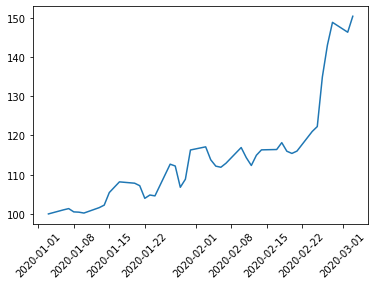

In [10]:
Plot(df)
plt.xticks(rotation=45)
plt.show()

In [39]:
df

2020-01-03   -0.024012
2020-01-06    0.010467
2020-01-07    0.003054
2020-01-08   -0.008260
2020-01-09   -0.000692
2020-01-10   -0.002253
2020-01-13    0.013684
2020-01-14    0.006408
2020-01-15    0.031280
2020-01-16    0.012999
2020-01-17    0.012727
2020-01-20   -0.003151
2020-01-21   -0.005893
2020-01-22   -0.030028
2020-01-23    0.008087
2020-01-24   -0.002100
2020-01-27    0.077274
2020-01-28   -0.004116
2020-01-29   -0.048350
2020-01-30    0.019211
2020-01-31    0.068522
2020-02-03    0.006904
2020-02-04   -0.028208
2020-02-05   -0.014249
2020-02-06   -0.002490
2020-02-07    0.009110
2020-02-10    0.035494
2020-02-11   -0.021958
2020-02-12   -0.017593
2020-02-13    0.023262
2020-02-14    0.011928
2020-02-17    0.000759
2020-02-18    0.015052
2020-02-19   -0.018508
2020-02-20   -0.004849
2020-02-21    0.005203
2020-02-24    0.043056
2020-02-25    0.010353
2020-02-26    0.103211
2020-02-27    0.060467
2020-02-28    0.040509
dtype: float64